In [2]:
import pandas as pd
import numpy as np
import ast
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import os
import matplotlib.pyplot as plt
import seaborn as sns

from Approach import DiffDockApproach, DiffDockPocketApproach, GninaApproach, SurfDockApproach, ICMApproach, ChaiApproach, VinaApproach

In [2]:
PLINDER_TEST_COLUMNS = [
    "system_id", "ligand_smiles",
    # binary 
    "ligand_is_covalent", "ligand_is_ion", "ligand_is_cofactor", "ligand_is_artifact",
    # discrete
    "system_num_protein_chains",
    "ligand_num_rot_bonds", "ligand_num_hbd", "ligand_num_hba", "ligand_num_rings",
    # continuous
    "entry_resolution", "entry_validation_molprobity", 
    "system_num_pocket_residues", "system_num_interactions",
    "ligand_molecular_weight", "ligand_crippen_clogp", 
    "ligand_num_interacting_residues", "ligand_num_neighboring_residues", "ligand_num_interactions",
]
# Create category mapping for visualization
CATEGORY_MAPPING = {
    "ligand_is_covalent": "binary",
    "ligand_is_ion": "binary",
    "ligand_is_cofactor": "binary",
    "ligand_is_artifact": "binary",
    "system_num_protein_chains": "discrete",
    "ligand_num_rot_bonds": "continuous",    
    "ligand_num_hbd": "continuous",
    "ligand_num_hba": "continuous",
    "ligand_num_rings": "discrete",
    "entry_resolution": "continuous",
    "entry_validation_molprobity": "continuous",
    "system_num_pocket_residues": "continuous",
    "system_num_interactions": "continuous",
    "ligand_molecular_weight": "continuous",
    "ligand_crippen_clogp": "continuous",
    "ligand_num_interacting_residues": "continuous",
    "ligand_num_neighboring_residues": "continuous",
    "ligand_num_interactions": "continuous",
    "ligand_is_artifact": "binary"         
}

In [3]:
exp_name = "plinder_set_0"
approaches = [
    # DiffDockApproach(),
    DiffDockPocketApproach(),
    GninaApproach(),
    SurfDockApproach(),
    ICMApproach(),
    ChaiApproach(),
    VinaApproach(),
]
df_all = []
for approach in approaches:
    method_name = approach.get_name()
    print(method_name)
    df_method  = pd.read_csv(f"{method_name}_{exp_name}_results.csv")
    print(df_method.shape)
    df_all.append(df_method)

df_combined = pd.concat(df_all, ignore_index=True)
df_combined.to_csv(f"plinder_set_0_combined_raw.csv", index=False)
print(df_combined.shape)

diffdock_pocket_only
(4660, 130)
gnina
(5160, 130)
surfdock
(5113, 130)
icm
(5050, 129)
chai-1
(4580, 130)
vina


/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_51648/3431699695.py:15: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_method  = pd.read_csv(f"{method_name}_{exp_name}_results.csv")
/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_51648/3431699695.py:15: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_method  = pd.read_csv(f"{method_name}_{exp_name}_results.csv")


(4791, 130)
(29354, 130)


In [4]:
inputs_csv = pd.read_csv('./plidner_test_input.csv')
print(inputs_csv.shape)
inputs_csv.head()

# Merge the two DataFrames on the 'system_id' column
test_annot_df = pd.read_csv('plinder_test.csv')
print(test_annot_df['system_id'].nunique())
print(test_annot_df.shape)
test_annot_df = test_annot_df[PLINDER_TEST_COLUMNS]

(1036, 18)
1036
(1436, 743)


/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_51648/1800416162.py:6: DtypeWarning: Columns (205,211,214,304) have mixed types. Specify dtype option on import or set low_memory=False.
  test_annot_df = pd.read_csv('plinder_test.csv')


In [5]:
# Filter test_annot_df to find entries with the specified system_id
specific_system = test_annot_df[test_annot_df['system_id'] == "1afb__1__1.A__1.D_1.F"]

# Display the number of instances found
print(f"Found {len(specific_system)} entries with system_id: '1afb__1__1.A__1.D_1.F'")

# If we have multiple entries, show the differences
if len(specific_system) > 1:
    print("\nDifferences between entries:")
    # For each column, check if there are differences
    for col in specific_system.columns:
        if specific_system[col].nunique() > 1:
            print(f"\nColumn '{col}' has different values:")
            for i, row in specific_system.iterrows():
                print(f"  Row {i}: {row[col]}")
else:
    # If only one entry, display its properties
    print("\nProperties of the system:")
    for col in specific_system.columns:
        print(f"{col}: {specific_system[col].values[0]}")
    
    # Check if this system has ions (from inputs_csv)
    ion_info = inputs_csv[inputs_csv['system_id'] == "1afb__1__1.A__1.D_1.F"]
    if not ion_info.empty:
        print(f"\nHas ion according to inputs_csv: {ion_info['has_ion'].values[0]}")

Found 2 entries with system_id: '1afb__1__1.A__1.D_1.F'

Differences between entries:

Column 'ligand_smiles' has different values:
  Row 233: CC(=O)N[C@@H]1[C@@H](O)[C@@H](O)[C@@H](CO)O[C@H]1O
  Row 234: [Ca+2]

Column 'ligand_is_ion' has different values:
  Row 233: False
  Row 234: True

Column 'ligand_num_rot_bonds' has different values:
  Row 233: 2
  Row 234: 0

Column 'ligand_num_hbd' has different values:
  Row 233: 5
  Row 234: 0

Column 'ligand_num_hba' has different values:
  Row 233: 6
  Row 234: 0

Column 'ligand_num_rings' has different values:
  Row 233: 1
  Row 234: 0

Column 'ligand_molecular_weight' has different values:
  Row 233: 221.0899372
  Row 234: 39.96149382

Column 'ligand_crippen_clogp' has different values:
  Row 233: -3.0776
  Row 234: -0.3808

Column 'ligand_num_interacting_residues' has different values:
  Row 233: 4
  Row 234: 3

Column 'ligand_num_neighboring_residues' has different values:
  Row 233: 11
  Row 234: 10

Column 'ligand_num_interactions' 

#### merge annotations

In [6]:
def safe_inchikey(smiles):
    try:
        # turn off automatic sanitization so we can catch errors
        m = Chem.MolFromSmiles(smiles, sanitize=False)
        Chem.SanitizeMol(m)                    # explicit sanitization step
        return Chem.MolToInchiKey(m)
    except Exception as e:
        # you can log e or the smiles here if you want to debug
        return None

In [7]:
# 1. Load
combined = pd.read_csv("plinder_set_0_combined_raw.csv")
combined['ligand_smiles'] = combined['protein'].map(
    inputs_csv.set_index('system_id')['ligand_description']
)
combined['system_id'] = combined['protein']
ann      = pd.read_csv("plinder_test.csv")
ann = ann[PLINDER_TEST_COLUMNS]

/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_51648/3017874190.py:2: DtypeWarning: Columns (4,76) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.read_csv("plinder_set_0_combined_raw.csv")
/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_51648/3017874190.py:7: DtypeWarning: Columns (205,211,214,304) have mixed types. Specify dtype option on import or set low_memory=False.
  ann      = pd.read_csv("plinder_test.csv")


In [8]:
# 2. Canonicalize to InChIKey
def to_inchikey(smiles):
    m = Chem.MolFromSmiles(smiles)
    return Chem.MolToInchiKey(m) if m else None

for df in (combined, ann):
    df['InChIKey'] = df['ligand_smiles'].apply(safe_inchikey)

# 3. Deduplicate annotations
ann_u = (
    ann
    .drop_duplicates(subset=['system_id','InChIKey'])
    .set_index(['system_id','InChIKey'])
)

# 4. Merge
merged = (
    combined
    .set_index(['system_id','InChIKey'])
    .join(ann_u, how='left', rsuffix='_ann')
    .reset_index()
)

# 5. Audit
total   = len(combined)
matched = merged['ligand_num_rot_bonds'].notna().sum()   # e.g. one annotation column
missing = total - matched
print(f"Annotated {matched}/{total}, missing {missing}")

# 6. (Optional) Fingerprint‐based rescue
from rdkit.Chem import AllChem
# precompute fingerprints on annotation side
ann_fp = ann.copy()
ann_fp['fp'] = ann_fp['ligand_smiles'].apply(lambda s: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s),2))
def rescue(row, ann_frame, thresh=0.9):
    grp = ann_frame[ann_frame.system_id == row.system_id]
    sims = grp['fp'].apply(lambda fp: DataStructs.TanimotoSimilarity(row.fp, fp))
    if sims.max() >= thresh:
        idx = sims.idxmax()
        return ann_frame.loc[idx, 'ligand_num_rot_bonds']  # or whatever you need
    return None

# For any `merged` row where key annotation is null:
merged['fp'] = combined['ligand_smiles'].apply(lambda s: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s),2))
mask = merged['ligand_num_rot_bonds'].isna()
merged.loc[mask, 'ligand_num_rot_bonds'] = merged[mask].apply(lambda r: rescue(r, ann_fp), axis=1)

[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] Invalid InChI prefix in generating InChI Key
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] Invalid InChI prefix in generating InChI Key
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] Invalid InChI prefix in generating InChI Key
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] Invalid InChI prefix in generating InChI Key
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] Invalid InChI prefix in generating InChI Key
[10:57:51] bond type above 3 (17) is treated as unspecified!
[10:57:51] bond type above 3 (17) is treated as u

Annotated 25931/29354, missing 3423


[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerator
[10:57:57] DEPRECATION WARNING: please use MorganGenerat

In [12]:
df_combined.shape, merged.shape

((29354, 130), (29354, 154))

In [14]:
merged['ligand_is_ion'].describe()

count     25931
unique        1
top       False
freq      25931
Name: ligand_is_ion, dtype: object

In [9]:
# Add has_ion column from inputs_csv to merged dataframe
merged['has_ion'] = merged['system_id'].map(inputs_csv.set_index('system_id')['has_ion'])

# Verify the column was added correctly
print(f"Number of systems with ions: {merged['has_ion'].sum()}")
print(f"Percentage of systems with ions: {merged['has_ion'].mean() * 100:.2f}%")

# Check if ligand_is_ion and has_ion are consistent
ion_match = (merged['ligand_is_ion'] == merged['has_ion']).mean() * 100
print(f"Consistency between ligand_is_ion and has_ion: {ion_match:.2f}%")

Number of systems with ions: 8175
Percentage of systems with ions: 27.85%
Consistency between ligand_is_ion and has_ion: 62.01%


In [10]:
merged.to_csv("plinder_set_0_annotated.csv", index=False)

## drop null rmsd 

In [15]:
for method in ['surfdock', 'diffdock_pocket_only', 'gnina', 'icm', 'chai-1']:
    print(f"Method: {method}")
    print(f"Number of entries: {merged[merged['method'] == method]['rmsd'].isna().sum()}")
    # Calculate total entries for this method
    total_entries = len(merged[merged['method'] == method])
    
    # Calculate null entries and percentage
    null_entries = merged[merged['method'] == method]['rmsd'].isna().sum()
    null_percentage = null_entries / total_entries * 100 if total_entries > 0 else 0
    
    # Print percentage of null entries
    print(f"Percentage of null RMSDs: {null_percentage:.2f}%")
    
    # Calculate remaining entries after dropping nulls
    remaining = total_entries - null_entries
    print(f"Entries remaining after dropping null RMSDs: {remaining} ({remaining/total_entries*100:.2f}%)")
    
    print("-" * 50)

# Drop rows with null RMSD values
merged_clean = merged.dropna(subset=['rmsd'])

# Print statistics of the cleaned dataset
print(f"Original dataset size: {len(merged)}")
print(f"Cleaned dataset size: {len(merged_clean)}")
print(f"Removed {len(merged) - len(merged_clean)} rows with null RMSD values ({(len(merged) - len(merged_clean))/len(merged)*100:.2f}%)")

# Save the cleaned dataset
merged_clean.to_csv("plinder_set_0_annotated.csv", index=False)

Method: surfdock
Number of entries: 0
Percentage of null RMSDs: 0.00%
Entries remaining after dropping null RMSDs: 5113 (100.00%)
--------------------------------------------------
Method: diffdock_pocket_only
Number of entries: 0
Percentage of null RMSDs: 0.00%
Entries remaining after dropping null RMSDs: 4660 (100.00%)
--------------------------------------------------
Method: gnina
Number of entries: 0
Percentage of null RMSDs: 0.00%
Entries remaining after dropping null RMSDs: 5160 (100.00%)
--------------------------------------------------
Method: icm
Number of entries: 110
Percentage of null RMSDs: 2.18%
Entries remaining after dropping null RMSDs: 4940 (97.82%)
--------------------------------------------------
Method: chai-1
Number of entries: 4
Percentage of null RMSDs: 0.09%
Entries remaining after dropping null RMSDs: 4576 (99.91%)
--------------------------------------------------
Original dataset size: 29354
Cleaned dataset size: 27623
Removed 1731 rows with null RMSD val

In [16]:
merged_clean['method'].value_counts()

method
gnina                   5160
surfdock                5113
icm                     4940
diffdock_pocket_only    4660
chai-1                  4576
vina                    3174
Name: count, dtype: int64

## Surfdock Renaming directoeis

In [5]:
import os
import re

# Directory path
dir_path = "/Users/aoxu/projects/DrugDiscovery/PoseBench/forks/SurfDock/inference/SurfDock_plinder_set_1/SurfDock_docking_result"

# List all directories
directories = [entry for entry in os.listdir(dir_path) 
               if os.path.isdir(os.path.join(dir_path, entry))]

renamed_count = 0
for entry in directories:
    # Check if directory needs renaming (ends with _ligand)
    if entry.endswith('_ligand'):
        # Split at _8A_
        if '_8A_' in entry:
            parts = entry.split('_8A_')
            base = parts[0] + '_8A'
            
            # Extract the ligand ID (the part after the last __)
            system_id = parts[0]
            ligand_id = system_id.split('__')[-1]
            
            # Create new name
            new_entry = f"{base}_{ligand_id}"
            
            # Rename the directory
            old_path = os.path.join(dir_path, entry)
            new_path = os.path.join(dir_path, new_entry)
            
            # Only rename if paths are different
            if old_path != new_path:
                os.rename(old_path, new_path)
                renamed_count += 1
                print(f"Renamed: {entry} → {new_entry}")

print(f"\nTotal directories renamed: {renamed_count}")


Renamed: 7tfp__2__1.B_2.C__2.F_2.G_8A_7tfp__2__1.B_2.C__2.F_2.G_ligand → 7tfp__2__1.B_2.C__2.F_2.G_8A_2.F_2.G
Renamed: 5jau__1__1.A__1.E_8A_5jau__1__1.A__1.E_ligand → 5jau__1__1.A__1.E_8A_1.E
Renamed: 8hx7__1__1.A__1.C_8A_8hx7__1__1.A__1.C_ligand → 8hx7__1__1.A__1.C_8A_1.C
Renamed: 4agi__1__1.C__1.W_8A_4agi__1__1.C__1.W_ligand → 4agi__1__1.C__1.W_8A_1.W
Renamed: 1j1m__1__1.A__1.B_8A_1j1m__1__1.A__1.B_ligand → 1j1m__1__1.A__1.B_8A_1.B
Renamed: 2xce__1__1.B_1.C__1.M_1.N_8A_2xce__1__1.B_1.C__1.M_1.N_ligand → 2xce__1__1.B_1.C__1.M_1.N_8A_1.M_1.N
Renamed: 6lq9__1__1.C__1.J_8A_6lq9__1__1.C__1.J_ligand → 6lq9__1__1.C__1.J_8A_1.J
Renamed: 3w6f__1__1.A__1.E_8A_3w6f__1__1.A__1.E_ligand → 3w6f__1__1.A__1.E_8A_1.E
Renamed: 4x97__1__1.A__1.H_8A_4x97__1__1.A__1.H_ligand → 4x97__1__1.A__1.H_8A_1.H
Renamed: 1nup__1__1.A_1.B__1.E_8A_1nup__1__1.A_1.B__1.E_ligand → 1nup__1__1.A_1.B__1.E_8A_1.E
Renamed: 1d7c__1__1.A_1.B__1.E_1.K_8A_1d7c__1__1.A_1.B__1.E_1.K_ligand → 1d7c__1__1.A_1.B__1.E_1.K_8A_1.E_1.K
Re

## surfdock count the empty directories

Total directories: 1160
Average files per directory: 39.79
Min files in a directory: 0
Max files in a directory: 40

Number of empty directories: 6
Sample of empty directories:
  - 1ogp__1__1.A__1.J_8A_1ogp__1__1.A__1.J_ligand
  - 5m92__1__1.A__1.D_1.E_1.N_8A_5m92__1__1.A__1.D_1.E_1.N_ligand
  - 7vzn__1__1.A_1.B__1.S_1.T_1.U_8A_7vzn__1__1.A_1.B__1.S_1.T_1.U_ligand
  - 6hto__1__1.B__1.O_1.P_1.Q_8A_6hto__1__1.B__1.O_1.P_1.Q_ligand
  - 4p3n__1__1.B__1.G_8A_4p3n__1__1.B__1.G_ligand
  - 2bii__1__2.A__2.I_8A_2bii__1__2.A__2.I_ligand


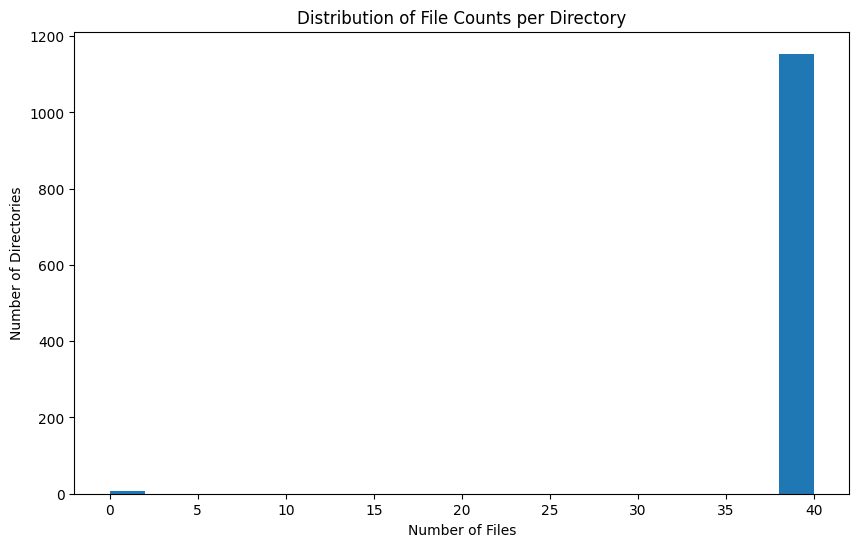

In [4]:
import os
from collections import defaultdict

# Directory counts
dir_counts = {}

# Loop through each directory
for dirname in os.listdir(dir_path):
    full_dir_path = os.path.join(dir_path, dirname)
    
    # Check if it's a directory
    if os.path.isdir(full_dir_path):
        # Count the number of files in the directory
        file_count = len([name for name in os.listdir(full_dir_path) if os.path.isfile(os.path.join(full_dir_path, name))])
        dir_counts[dirname] = file_count

# Display summary statistics
counts = list(dir_counts.values())
avg_count = sum(counts) / len(counts) if counts else 0
min_count = min(counts) if counts else 0
max_count = max(counts) if counts else 0

print(f"Total directories: {len(dir_counts)}")
print(f"Average files per directory: {avg_count:.2f}")
print(f"Min files in a directory: {min_count}")
print(f"Max files in a directory: {max_count}")

# Find and print empty directories
empty_dirs = [dirname for dirname, count in dir_counts.items() if count == 0]
print(f"\nNumber of empty directories: {len(empty_dirs)}")
if empty_dirs:
    print("Sample of empty directories:")
    for dirname in empty_dirs[:10]:  # Show first 10 to avoid overwhelming output
        print(f"  - {dirname}")
    if len(empty_dirs) > 10:
        print(f"  ... and {len(empty_dirs) - 10} more")

# Display histogram of file counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=20)
plt.xlabel('Number of Files')
plt.ylabel('Number of Directories')
plt.title('Distribution of File Counts per Directory')
plt.show()

In [5]:
boltz_df = pd.read_csv("boltz_plinder_set_1_results.csv")
boltz_df.head()
boltz_df['rmsd'].describe()

/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_49320/1888908420.py:1: DtypeWarning: Columns (81,82,89,95,96,103) have mixed types. Specify dtype option on import or set low_memory=False.
  boltz_df = pd.read_csv("boltz_plinder_set_1_results.csv")


count    360.000000
mean      86.189456
std       78.510626
min        4.178474
25%       38.298766
50%       68.632199
75%       97.717684
max      412.804731
Name: rmsd, dtype: float64